In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
cifar_train = pd.DataFrame()

for filename in os.listdir("cifar-10-batches-py"):
    if filename[-1].isdigit():
        data = unpickle("cifar-10-batches-py/" + filename)
        data = pd.DataFrame(list(zip(data[b'labels'], data[b'data'])), columns=["label", "data"])
        cifar_train = pd.concat([cifar_train, data], ignore_index=True)
cifar_train

,label,data
0,6,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ..."
1,9,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ..."
2,9,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ..."
3,4,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3..."
4,1,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ..."
5,1,"[159, 150, 153, 154, 138, 184, 154, 77, 61, 64..."
6,2,"[164, 105, 118, 129, 134, 146, 166, 183, 199, ..."
7,7,"[28, 30, 33, 62, 63, 31, 29, 42, 55, 67, 92, 7..."
8,8,"[134, 131, 128, 133, 139, 140, 134, 121, 124, ..."
9,3,"[125, 110, 102, 106, 106, 141, 175, 175, 148, ..."


In [8]:
pic = cifar_train.loc[32, 'data']

In [9]:
im_r = pic[0:1024].reshape(32,32)
im_g = pic[1024:2048].reshape(32,32)
im_b = pic[2048:3072].reshape(32,32)

img = np.dstack((im_r, im_g, im_b))

In [10]:
pic1 = pic.reshape((32,32,3), order = 'F')

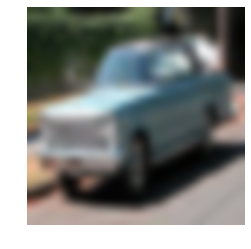

In [11]:
plt.imshow(img, interpolation='bicubic')
plt.axis('off')
plt.show()